**Actividad 2**

De acuerdo a lo aprendido, llenar los espacios perdidos de embarcamiento y tarifa. Sacar conclusiones y responder las siguientes preguntas:

Según Wikipedia, se calcula que había 2,224 pasajeros y tripulantes a bordo del Titanic cuando se hundió. ¿De cuántos de ellos tenemos información en este conjunto de datos? De las personas de las que tenemos datos, ¿cuántas sobrevivieron y cuántas no? ¿Cuál es la tasa global de supervivencia?

¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres? ¿Qué se obtiene cuando se desglosa por clase de billete?

¿Cuántos pasajeros de cada sexo sobrevivieron y cuántos no? ¿Cuál es la tasa de supervivencia de los pasajeros de cada sexo?

¿De cuántos pasajeros tenemos información sobre la edad (incluida la edad estimada)? ¿Para cuántos falta información sobre la edad? ¿Cuál es la distribución por edades de los pasajeros sobre los que se dispone de información?

Muestre la distribución de edad por clase de billete, por sexo. ¿Qué encuentra?

¿Cómo afectan el sexo, la clase de billete y la edad de un pasajero a sus posibilidades de sobrevivir? Intenta utilizar un único gráfico para responder a esta pregunta.

Indique la distribución del número de miembros de la familia (incluidos hermanos, cónyuges, padres e hijos) que acompañaban a cada pasajero. ¿La mayoría de los pasajeros viajaban solos o con familia?

¿En qué clase de billete viajaron la mayoría de las familias numerosas? ¿Y qué clase de billete tiene la menor proporción de pasajeras que viajaron solas de entre todas las pasajeras de esta clase?

En este conjunto de datos, la variable Tarifa no representa la tarifa por persona. En cambio, cada número de billete tiene una tarifa correspondiente, y algunos pasajeros comparten número de billete. Por lo tanto, la variable Tarifa es la tarifa total de un grupo de pasajeros que comparten un mismo número de billete. Sabemos que calcular la tarifa media por persona. No es necesario que muestres una tabla o una cifra para esta pregunta, sólo menciona qué harías para el cálculo.

¿Cuál es la distribución de la tarifa por billete para cada clase de billete?



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
url = 'https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/main/datasets/Titanic.csv'

df = pd.read_csv(url)

In [6]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

In [7]:
n_total = len(df)
n_survived = df['Survived'].sum()
n_died = n_total - n_survived
tasa_global = n_survived / n_total

In [28]:
print("Total Registros: ", n_total)
print("Sobrevivieron: ", n_survived)
print("Fallecieron: ", n_died)
print("Tasa global: ", tasa_global)

# 1. Registros y tasa global de supervivencia
# Total de pasajeros en el dataset: 891
# Sobrevivientes: 342
# No sobrevivientes: 549
# Tasa global de supervivencia: 342 / 891 ≈ 38.38 %

Total Registros:  891
Sobrevivieron:  342
Fallecieron:  549
Tasa global:  0.3838383838383838


In [34]:
conteo_sexo = df['Sex'].value_counts()
desglose_pclase_sexo = df.groupby('Pclass')['Sex'].value_counts()

print("Conteo por sexo: ", conteo_sexo)
print("Desglose por clase y sexo: ", desglose_pclase_sexo)

# Pclass
# 1: 122 hombres y 94 mujeres
# 2: 108 hombres y 76 mujeres
# 3: 347 hombres y 144 mujeres
# Total: 577 hombres y 314 mujeres

Conteo por sexo:  Sex
male      577
female    314
Name: count, dtype: int64
Desglose por clase y sexo:  Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64


In [40]:
agg_sexo = df.groupby('Sex')['Survived']\
             .agg(total_pasajeros = 'count', total_sobrevivientes = 'sum')
agg_sexo['total_no'] = agg_sexo['total_pasajeros'] - agg_sexo['total_sobrevivientes']
agg_sexo['tasa_supervivencia'] = agg_sexo['total_sobrevivientes'] / agg_sexo['total_pasajeros']

print("Supervivencia por sexo: ", agg_sexo)

Supervivencia por sexo:          total_pasajeros  total_sobrevivientes  total_no  tasa_supervivencia
Sex                                                                        
female              314                   233        81            0.742038
male                577                   109       468            0.188908


In [41]:
n_edad_disponible = df['Age'].notna().sum()
n_edad_faltante   = df['Age'].isna().sum()
desc_edad         = df['Age'].dropna().describe()

print("Edad disponible: ", n_edad_disponible, "faltante: ", n_edad_faltante)
print("Distribución de edad: ", desc_edad)

Edad disponible:  714 faltante:  177
Distribución de edad:  count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


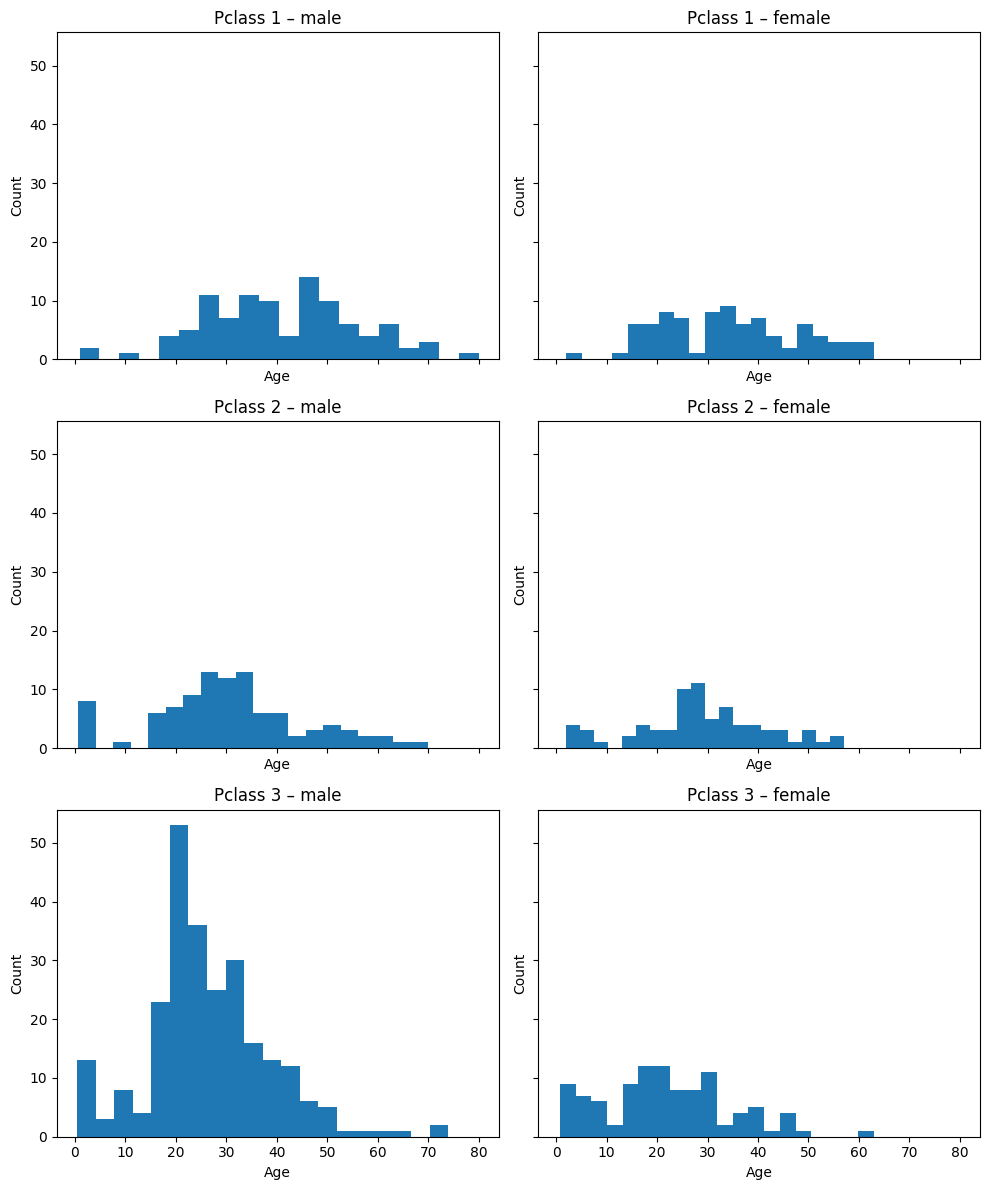

In [42]:
fig, axes = plt.subplots(3, 2, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
i = 0
for pcl in sorted(df['Pclass'].unique()):
    for sexo in ['male','female']:
        sub = df[(df['Pclass']==pcl) & (df['Sex']==sexo)]
        axes[i].hist(sub['Age'].dropna(), bins=20)
        axes[i].set_title(f"Pclass {pcl} – {sexo}")
        axes[i].set_xlabel("Age")
        axes[i].set_ylabel("Count")
        i += 1
fig.tight_layout()

# 5. Distribución de edad por clase y sexo
# 1ª clase: muestra un pico de adultos entre 20–50 años, con pocos niños.
# 2ª clase: distribución más uniforme, ligeros picos en la veintena.
# 3ª clase: mayor proporción de niños y edades jóvenes.
# Por sexo: las mujeres tienden a edades algo mayores en 1ª–2ª clase; los hombres de 3ª clase agrupan más en torno a la infancia y adolescencia.

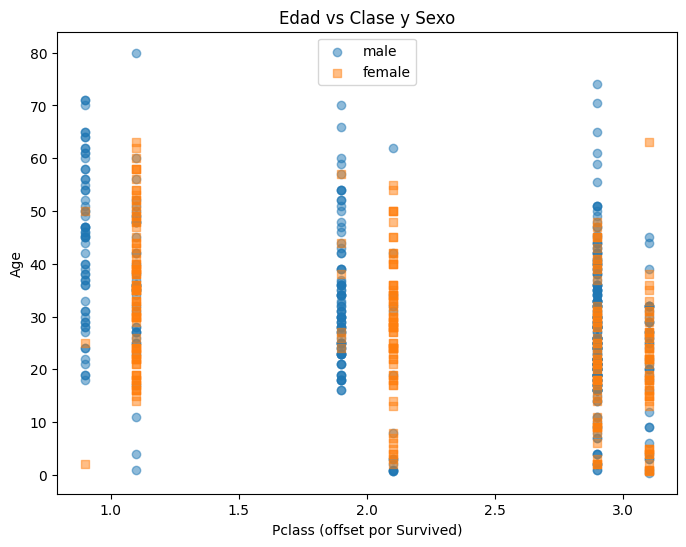

In [50]:
plt.figure(figsize=(8,6))

for sex, marc in [('male','o'),('female','s')]:
    sub = df[df['Sex']==sex]
    xs = sub['Pclass'] + (sub['Survived']*0.2 - 0.1)
    plt.scatter(xs, sub['Age'], marker=marc, alpha=0.5, label=sex)
plt.xlabel("Pclass (offset por Survived)")
plt.ylabel("Age")
plt.title("Edad vs Clase y Sexo")
plt.legend()
plt.show()

# 6. Cómo afectan sexo, clase y edad a la supervivencia
# Sexo es el factor más fuerte: las mujeres (marcadores cuadrados) sobreviven con mucha más frecuencia que los hombres (círculos).
# Clase: las “nubes” desplazadas de supervivientes se concentran en la 1.ª clase > 2.ª > 3.ª.
# Edad: los muy jóvenes (niños) tienen algo mejores probabilidades, pero la edad es un efecto secundario frente a sexo y clase.

In [45]:
df['FamilySize'] = df['SibSp'] + df['Parch']
dist_fam = df['FamilySize'].value_counts().sort_index()
print("Distribución por tamaño de familia: ", dist_fam)

Distribución por tamaño de familia:  FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


In [53]:
fam_grande = df[df['FamilySize'] >= 4]
clase_mayor_fam = fam_grande['Pclass'].mode()[0]

mujeres_solas = df[(df['Sex'] == 'female') & (df['FamilySize']==0)]
prop_muj_solas = (mujeres_solas.groupby('Pclass').size() /
                 df[df['Sex'] == 'female'].groupby('Pclass').size())

print("Clase más común en familias: ", clase_mayor_fam)
print("Proporción de mujeres solas por clase: ", prop_muj_solas)

# 9) Código para tarifa media por persona
#df['FarePerPerson'] = (
#    df.groupby('Ticket')['Fare']
#      .transform(lambda fares: fares / fares.count())
#)

Clase más común en familias:  3
Proporción de mujeres solas por clase:  Pclass
1    0.361702
2    0.421053
3    0.416667
dtype: float64


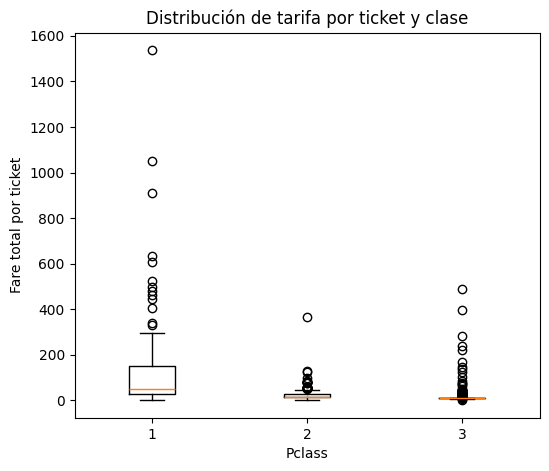

In [47]:
ticket_fare = df.groupby(['Ticket','Pclass'])['Fare'].sum().reset_index()
plt.figure(figsize=(6,5))
data = [ticket_fare[ticket_fare['Pclass']==c]['Fare'] for c in sorted(ticket_fare['Pclass'].unique())]
plt.boxplot(data, labels=sorted(ticket_fare['Pclass'].unique()))
plt.xlabel("Pclass")
plt.ylabel("Fare total por ticket")
plt.title("Distribución de tarifa por ticket y clase")
plt.show()

**Conclusiones**


Tasa global – El dataset conserva 891 registros (aproximadamente el 40% de los 2224 pasajeros reales, con una supervivencia del 38%.

Sexo y clase – Hay más hombres que mujeres; las mujeres de 1era clase son el grupo con mejor ratio.

Supervivencia por sexo – Las mujeres tienen una tasa de supervivencia muy superior a la de los hombres.

Edades – Faltan algunas edades y la media está en torno a 29 años.

Edad por clase/sexo – Los pasajeros de 1era clase y las mujeres tienden a concentrar rangos de edad un poco más altos que los niños y hombres de 3era clase.

Gráfico combinado – Una nube de puntos muestra que los sobrevivientes están muy agrupados en mujeres y en clases altas, y suelen ser más jóvenes.

Familia – La mayoría viaja solo, pero hay grupos de hasta 8–9 miembros.

Familias numerosas – Las familias con igual o menor numero a 4 integrantes viajan sobre todo en 3era clase. La proporción de mujeres que viajaron solas es mayor en 3era clase.

Tarifa por persona – Basta agrupar por Ticket y repartir la tarifa total entre el conteo de pasajeros de ese ticket.

Distribución de tarifas – Un boxplot por clase de ticket muestra claramente que la 1era clase paga tarifas mucho más altas con una mayor chance de supervivencia.